**1.- CARGAR LIBRERIAS**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical

**2.- CARGAR DATOS**

In [2]:
# Cargar los datos
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Normalizar los datos (convertir de 0-255 a 0-1)
train_data = train_data.astype('float32') / 255.0
test_data = test_data.astype('float32') / 255.0

# Ajustar forma para la red convolucional (28x28x1)
train_data = np.expand_dims(train_data, -1)
test_data = np.expand_dims(test_data, -1)

# Convertir etiquetas a one-hot encoding
train_labels_cat = to_categorical(train_labels, 10)
test_labels_cat = to_categorical(test_labels, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


**3.- CREAR RED NEURONAL CONVOLUCIONAL**

In [3]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Capa de salida
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**4.- COMPILACION DEL MODELO**

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**5.-ENTRENAR AL MODELO**

In [5]:
model.fit(train_data, train_labels_cat, epochs=5, batch_size=128, verbose=1)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 84ms/step - accuracy: 0.8597 - loss: 0.4885
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 84ms/step - accuracy: 0.9818 - loss: 0.0601
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 83ms/step - accuracy: 0.9882 - loss: 0.0383
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 83ms/step - accuracy: 0.9919 - loss: 0.0286
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 83ms/step - accuracy: 0.9931 - loss: 0.0217


**6.- EVALUAR EL MODELO**

In [6]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels_cat, verbose=0)
print(f'Exactitud en datos de prueba: {test_accuracy * 100:.2f}%')

Exactitud en datos de prueba: 98.96%


**7.- 5 PREDICCIONES Y MUESTRA DE RESULTADOS**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


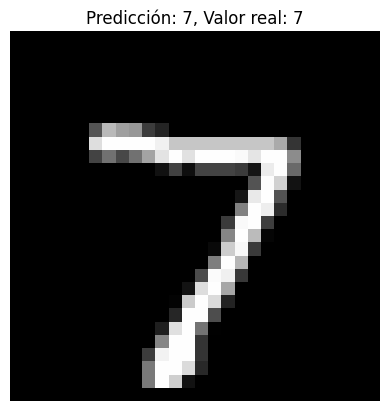

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


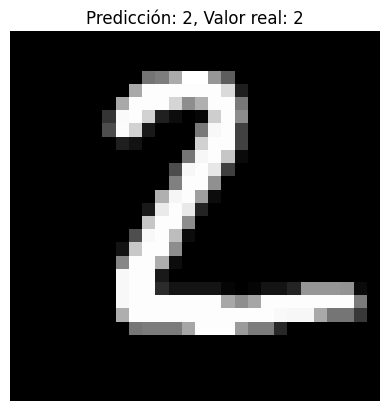

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


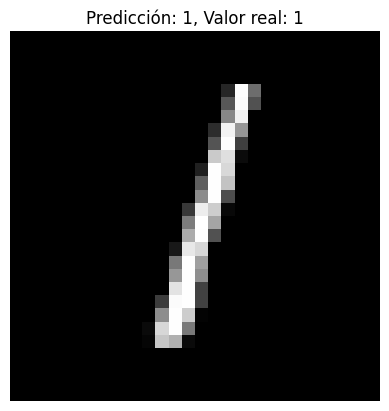

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


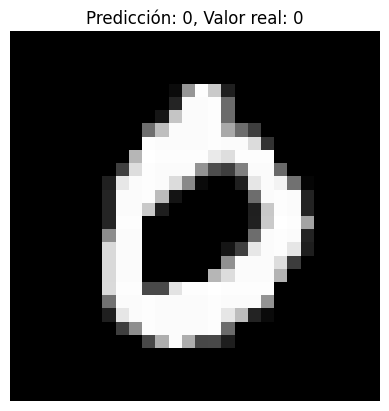

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


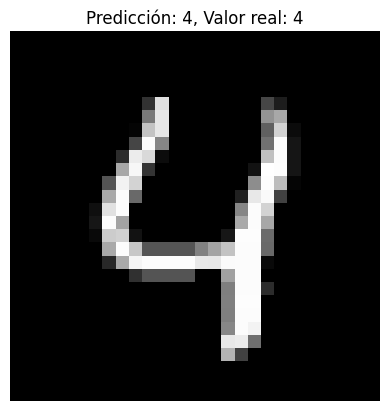

In [7]:
# Seleccionamos 5 muestras del conjunto de prueba
for i in range(5):
    sample = np.expand_dims(test_data[i], axis=0)
    prediction = model.predict(sample)
    predicted_label = np.argmax(prediction)
    true_label = test_labels[i]

    plt.imshow(test_data[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicción: {predicted_label}, Valor real: {true_label}')
    plt.axis('off')
    plt.show()
